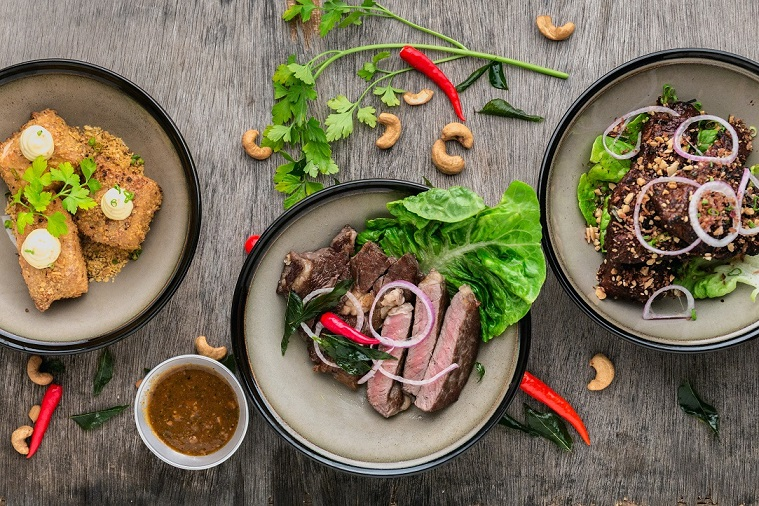

# Food Classification using CNN [10 pts]

In this homework, we will create a CNN that classifies 🍽️ food images containing 10 classes. The dataset that we will use is a subset of the [**Food-101**](https://www.kaggle.com/kmader/food41) dataset which contains labeled food images.

The data preparation and creation of a baseline CNN is already taken care for you. Your task for this homework is as follows:

<div class="alert alert-success">
    
**Task 1 [5 pts]** Currently, the model classifies the food images by 28.3%. Improve the performance of the baseline model by changing the **model architecture**, performing **data augmentation**, and/or **hyperparameter tuning**.

**Task 2 [5 pts]** Use a **pre-trained model** to greatly improve the performance of the model. You may opt to use any of the three techniques discussed in class.
</div>

Be prepared to discuss your results in the upcoming recit class.

## Dataset Preparation

We first need to download the source file contained in this google drive: https://drive.google.com/file/d/1wY2jY0Hx1qKSrxbpJyOKw5q5Y9kaf_Z5/view?usp=sharing then add it to the current data in our google colab drive.

In [2]:
# !gdown --id 1wY2jY0Hx1qKSrxbpJyOKw5q5Y9kaf_Z5 -O ./data.zip
# !unzip data.zip

In [3]:
'test'

'test'

## Task 1: Baseline CNN

### Data Preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set train and test data path
train_dirpath = './data/train/'
test_dirpath = './data/test/'

# Rescale image
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data and turn into batches
train_data = train_datagen.flow_from_directory(
   train_dirpath, target_size=(224, 224), batch_size=32,
    class_mode="categorical"
)
test_data = train_datagen.flow_from_directory(
   test_dirpath, target_size=(224, 224), batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Task 1

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 rotation_range=40,
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 shear_range=0.2,
                 zoom_range=0.2,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)
#rescale to [0-1], add zoom range of 0.2x, width and height shift and horizontal flip

train_generator = train_datagen.flow_from_directory(
        train_dirpath,
        target_size=(224,224),       # resize images to (224,224) to increase the training speed and efficiency
        batch_size=64)

test_datagen = ImageDataGenerator(rescale=1./255)    # rescale to [0-1] for testing set

test_generator = test_datagen.flow_from_directory(
        test_dirpath,
        target_size=(224,224),
        batch_size=64)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Baseline Model

#### Build the model

In [3]:
from tensorflow.keras.regularizers import L1L2

In [ ]:
'test'

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# Create the model using the functional API
inputs = keras.Input(shape=(224, 224, 3))

# Build convolutional Layers
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

# Feed into the dense layer
outputs = layers.Dense(10, activation="softmax")(x)

# Build the model
model = keras.Model(inputs=inputs, outputs=outputs)

2022-01-24 18:10:15.115671: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 18:10:16.055184: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10419 MB memory:  -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
dropout (Dropout)            (None, 220, 220, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 108, 108, 128)     0     

#### Compile the model

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=['accuracy'])

#### Fitting the model

In [10]:
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

2022-01-24 18:10:38.992214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-01-24 18:10:41.376962: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-01-24 18:10:41.692509: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-24 18:10:41.693271: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-24 18:10:41.693309: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-01-24 18:10:41.694403: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-24 18:10:41.694500: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


118/118 [==============================] - 141s 1s/step - loss: 3.2524 - accuracy: 0.1363 - val_loss: 2.2601 - val_accuracy: 0.1840
Epoch 2/20
118/118 [==============================] - 134s 1s/step - loss: 2.2423 - accuracy: 0.1901 - val_loss: 2.2283 - val_accuracy: 0.1892
Epoch 3/20
118/118 [==============================] - 135s 1s/step - loss: 2.1186 - accuracy: 0.2460 - val_loss: 1.9817 - val_accuracy: 0.3076
Epoch 4/20
118/118 [==============================] - 138s 1s/step - loss: 2.0510 - accuracy: 0.2859 - val_loss: 1.8963 - val_accuracy: 0.3524
Epoch 5/20
118/118 [==============================] - 138s 1s/step - loss: 1.9971 - accuracy: 0.3109 - val_loss: 1.8560 - val_accuracy: 0.3916
Epoch 6/20
118/118 [==============================] - 149s 1s/step - loss: 1.9492 - accuracy: 0.3263 - val_loss: 1.8968 - val_accuracy: 0.3692
Epoch 7/20
118/118 [==============================] - 140s 1s/step - loss: 1.9331 - accuracy: 0.3397 - val_loss: 1.8035 - val_accuracy: 0.3872
Epoch 8/20

#### Evaluate the model

In [11]:
model.evaluate(test_data)

79/79 [==============================] - 14s 152ms/step - loss: 1.7610 - accuracy: 0.4908


[1.7610291242599487, 0.49079999327659607]

#### Task 1 Results

The baseline model was improved by doing the following:
 - Adding 2 dropout layers with rates 0.3 and 0.2 in between the architecture
 - Increasing the number of filters for each convolutional layer
 - increasing epochs to 20
 - increasing batch size to 64 from 32.
 - performed data augmentation during training
 
Final Test Accuracy : `49%`

## Task 2

In [12]:
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(224, 224, 3))

In [ ]:
# conv_base

In [ ]:


# model2 = models.Sequential()

# # We are now adding the basemodel!
# model2.add(conv_base)

# # flatten first because these densely-connected layers 
# # don’t support multidimensional data!
# model2.add(layers.Flatten())

# # input from previous layer is now ready for the dense layer
# model2.add(layers.Dense(256, activation='relu'))

# # removing 50% of the weights every batch iteration
# model2.add(layers.Dropout(0.2))

# # binary classification
# model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
# model2.summary()

In [ ]:
# print('This is the number of trainable weights before freezing the conv base:',
#       len(model2.trainable_weights))

# # Freeze the base!
# conv_base.trainable = False

# print('This is the number of trainable weights after freezing the conv base:',
#       len(model2.trainable_weights))

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
 
# we are going to use generators because we want to do some data augmentation
# imagedatagenerators are our friends when it comes to data augmentation stuff
# train_datagen = ImageDataGenerator(featurewise_center=False,
#                  samplewise_center=False,
#                  featurewise_std_normalization=False,
#                  samplewise_std_normalization=False,
#                  zca_whitening=False,
#                  rotation_range=40,
#                  width_shift_range=0.2,
#                  height_shift_range=0.2,
#                  shear_range=0.2,
#                  zoom_range=0.2,
#                  channel_shift_range=0.,
#                  fill_mode='nearest',
#                  cval=0.,
#                  horizontal_flip=True,
#                  vertical_flip=False,
#                  rescale=1/255)
  
# train_generator = train_datagen.flow_from_directory(
#     train_dirpath,
#     target_size=(224, 224),
#     batch_size=196)
 
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     test_dirpath,
#     target_size=(224, 224),
#     batch_size=196)
 


In [ ]:
# model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# history = model2.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=5,
#     validation_data=test_generator,
#     validation_steps=len(test_generator))

In [ ]:
# model2.evaluate(test_data)

In [ ]:
#######

In [14]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception
from keras import models
from keras import layers

# inception = Xception(weights='imagenet', include_top=False)
# x = inception.output
# #base_x = conv_base(inputs)
# #x = layers.Flatten()(base_x)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256,activation='relu')(x)
# # x = Dropout(0.4)(x)
# x = Dense(128,activation='relu')(x)
# x = Dropout(0.2)(x)

# predictions = Dense(10, activation='softmax')(x)

# model = Model(inputs=inception.input, outputs=predictions)

In [15]:
model = models.Sequential()

xcep = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
xcep.trainable = False
model.add(xcep)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [16]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 rotation_range=40,
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 shear_range=0.2,
                 zoom_range=0.2,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255)
  
train_generator = train_datagen.flow_from_directory(
    train_dirpath,
    target_size=(224, 224),
    batch_size=196)
 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dirpath,
    target_size=(224, 224),
    batch_size=196)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/home/msds2022/jgacal/.conda/envs/msds2022-ml3/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator))

Epoch 1/20
39/39 [==============================] - 140s 3s/step - loss: 1.3547 - accuracy: 0.5633 - val_loss: 0.5714 - val_accuracy: 0.8180
Epoch 2/20
39/39 [==============================] - 135s 3s/step - loss: 0.9794 - accuracy: 0.6929 - val_loss: 0.5173 - val_accuracy: 0.8300
Epoch 3/20
39/39 [==============================] - 131s 3s/step - loss: 0.9080 - accuracy: 0.7124 - val_loss: 0.4986 - val_accuracy: 0.8408
Epoch 4/20
39/39 [==============================] - 132s 3s/step - loss: 0.8632 - accuracy: 0.7199 - val_loss: 0.4655 - val_accuracy: 0.8452
Epoch 5/20
39/39 [==============================] - 132s 3s/step - loss: 0.8140 - accuracy: 0.7411 - val_loss: 0.4815 - val_accuracy: 0.8460
Epoch 6/20
39/39 [==============================] - 133s 3s/step - loss: 0.7991 - accuracy: 0.7471 - val_loss: 0.4475 - val_accuracy: 0.8540
Epoch 7/20
39/39 [==============================] - 132s 3s/step - loss: 0.7652 - accuracy: 0.7544 - val_loss: 0.4432 - val_accuracy: 0.8524
Epoch 8/20
39

In [19]:
model.evaluate(test_data)

79/79 [==============================] - 14s 168ms/step - loss: 0.4103 - accuracy: 0.8628


[0.41031092405319214, 0.8628000020980835]

## Task 2 Results

A slow extraction approach was used on the Xception pre-trained model. The classifier was replaced with our custom classifier. The classifier follows the following architecture:
 
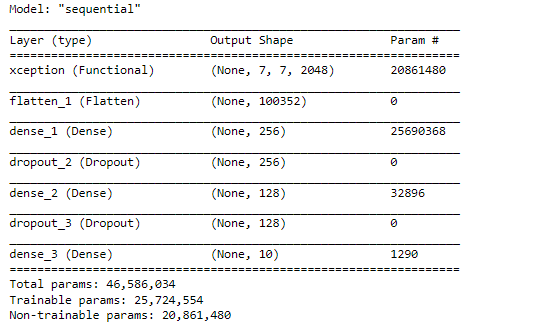
 
In addition, data augmentation was performed during training.
 
Final Test Accuracy : `86.3%`